In [1]:
!pip install pynec


  Preparing metadata (setup.py) ... done
  Created wheel for pynec: filename=PyNEC-1.7.3.6-cp310-cp310-linux_x86_64.whl size=10668 sha256=04d9afad2a7f7a6e351e8b54b682252c5165d16ef2b50f1390ac7cc8a7388ce4
  Stored in directory: /root/.cache/pip/wheels/0a/d4/1a/0c556129d8739586e6b89805e81e27798d91548a70b4f0505d
Successfully built pynec


In [2]:
# Instalar o nec2c no Colab
!apt-get install nec2c


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  nec2c
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 122 kB of archives.
After this operation, 319 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 nec2c amd64 1.3-4 [122 kB]
Fetched 122 kB in 0s (333 kB/s)
Selecting previously unselected package nec2c.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../archives/nec2c_1.3-4_amd64.deb ...
Unpacking nec2c (1.3-4) ...
Setting up nec2c (1.3-4) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:

import subprocess
import numpy as np

# Gerar o arquivo de entrada .nec para o Nec2c
nec_input = """
CM Teste Monopolo Vertical
CE

GW 1 20 0 0 0 0 0 4.6 0.005
GE 0
GN 2 0 0 0 13 0.005
EK
EX 0 1 10 0 1 0
FR 0 1 0 0 15.0 0
RP 0 91 1 1000 0 0 5 5 0 0
EN
"""

# Escrever o arquivo de entrada
with open("monopole.nec", "w") as f:
    f.write(nec_input)

# Rodar o Nec2c com o arquivo de entrada gerado
result = subprocess.run(['nec2c', '-i', 'monopole.nec'], capture_output=True, text=True)

# Verificar a saída do comando
print(result.stdout)

# Ler os resultados do arquivo de saída gerado (monopole.out)
with open("monopole.out", "r") as f:
    output_data = f.read()

print(output_data)






                               __________________________________________
                              |                                          |
                              |  NUMERICAL ELECTROMAGNETICS CODE (nec2c) |
                              |   Translated to 'C' in Double Precision  |
                              |__________________________________________|



                               ---------------- COMMENTS ----------------
                               Teste Monopolo Vertical
                              



                               -------- STRUCTURE SPECIFICATION --------
                                     COORDINATES MUST BE INPUT IN
                                     METERS OR BE SCALED TO METERS
                                     BEFORE STRUCTURE INPUT IS ENDED

  WIRE                                                                                 SEG FIRST  LAST  TAG
   No:        X1         Y1         Z1         X2         Y2         Z2 

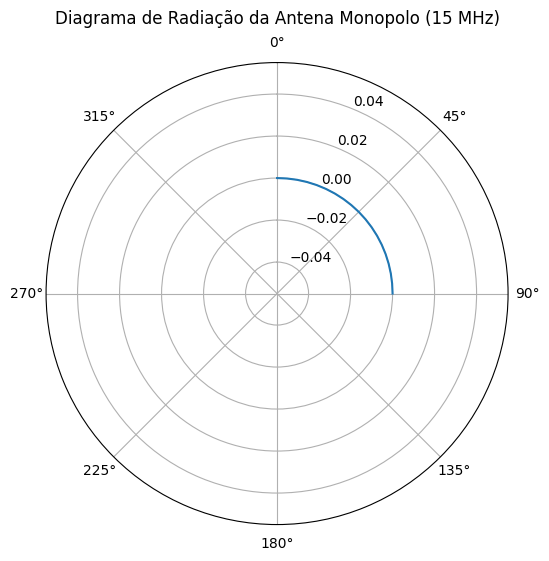

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    # Encontrar a seção "RADIATION PATTERNS"
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 4  # Os dados começam algumas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_total = []

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        # Verificar se o primeiro item é um número, ignorando cabeçalhos
        try:
            angle = float(data[0])
            gain = float(data[5])
            theta.append(angle)  # Ângulo THETA
            gain_total.append(gain)  # Ganho TOTAL em dB
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return np.radians(theta), gain_total

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados de radiação
theta, gain_total = extract_radiation_pattern(output_data)

# Plotar o diagrama de radiação
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, gain_total)
ax.set_title("Diagrama de Radiação da Antena Monopolo (15 MHz)", va='bottom')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()


In [ ]:
# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Exibir as primeiras 50 linhas do arquivo para inspeção
output_lines = output_data.splitlines()
for line in output_lines[:50]:  # Limitar a exibição para as primeiras 50 linhas
    print(line)





                               __________________________________________
                              |                                          |
                              |  NUMERICAL ELECTROMAGNETICS CODE (nec2c) |
                              |   Translated to 'C' in Double Precision  |
                              |__________________________________________|



                               ---------------- COMMENTS ----------------
                               Teste Monopolo Vertical
                              



                               -------- STRUCTURE SPECIFICATION --------
                                     COORDINATES MUST BE INPUT IN
                                     METERS OR BE SCALED TO METERS
                                     BEFORE STRUCTURE INPUT IS ENDED

  WIRE                                                                                 SEG FIRST  LAST  TAG
   No:        X1         Y1         Z1         X2         Y2         Z2  

In [ ]:
# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Procurar a seção de padrões de radiação
lines = output_data.splitlines()
for i, line in enumerate(lines):
    if "RADIATION PATTERNS" in line:
        print(f"Encontrado 'RADIATION PATTERNS' na linha {i}:")
        # Exibir as próximas 20 linhas após o cabeçalho para inspeção
        for j in range(i, i + 20):
            print(lines[j])
        break


Encontrado 'RADIATION PATTERNS' na linha 130:
                             ---------- RADIATION PATTERNS -----------

 ---- ANGLES -----     ----- POWER GAINS -----       ---- POLARIZATION ----   ---- E(THETA) ----    ----- E(PHI) ------
  THETA      PHI       VERTC    HORIZ    TOTAL       AXIAL      TILT  SENSE   MAGNITUDE    PHASE    MAGNITUDE     PHASE
 DEGREES   DEGREES        DB       DB       DB       RATIO   DEGREES            VOLTS/M   DEGREES     VOLTS/M   DEGREES
    0.00      0.00   -999.99  -999.99  -999.99      0.0000      0.00         0.0000E+00      0.00  0.0000E+00      0.00
    5.00      0.00    -21.92  -999.99   -21.92      0.0000     -0.00 LINEAR  3.5187E-03   -172.80  0.0000E+00      0.00
   10.00      0.00    -15.89  -999.99   -15.89      0.0000     -0.00 LINEAR  7.0500E-03   -172.89  0.0000E+00      0.00
   15.00      0.00    -12.34  -999.99   -12.34      0.0000     -0.00 LINEAR  1.0602E-02   -173.04  0.0000E+00      0.00
   20.00      0.00     -9.82  -999.99    -

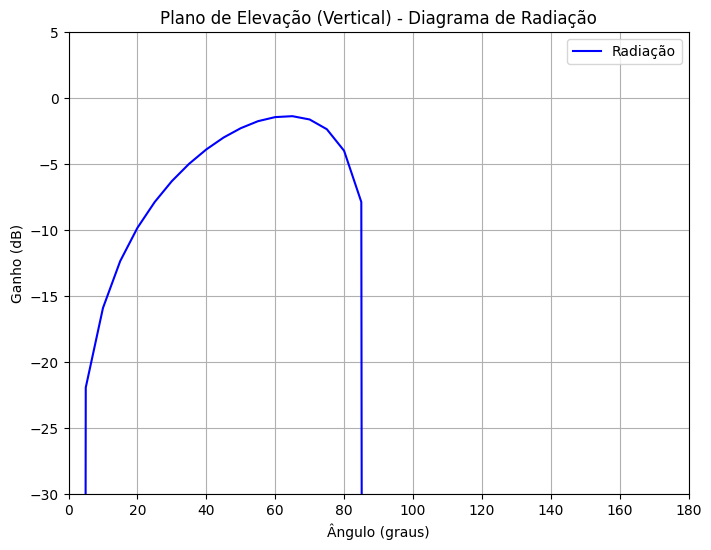

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_total = []

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain = float(data[4])   # TOTAL (Ganho em dB)
            theta.append(angle)  # Adicionar o ângulo
            gain_total.append(gain)  # Adicionar o ganho total
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return np.radians(theta), gain_total

# Frequências a serem simuladas (em MHz)
frequencies = [3, 5, 10, 15, 20, 25]
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Criar o gráfico para o plano de elevação (vertical)
plt.figure(figsize=(8, 6))

theta, gain_total = extract_radiation_pattern(output_data)

# Plotar o padrão de radiação
plt.plot(np.degrees(theta), gain_total, label="Radiação", color='b')

# Configurações do gráfico
plt.title("Plano de Elevação (Vertical) - Diagrama de Radiação")
plt.xlabel("Ângulo (graus)")
plt.ylabel("Ganho (dB)")
plt.grid(True)
plt.xlim([0, 180])  # Mostrar de 0 a 180 graus (corresponde a -180° a 0°)
plt.ylim([-30, 5])  # Ajustar a escala do ganho conforme necessário
plt.legend()
plt.show()


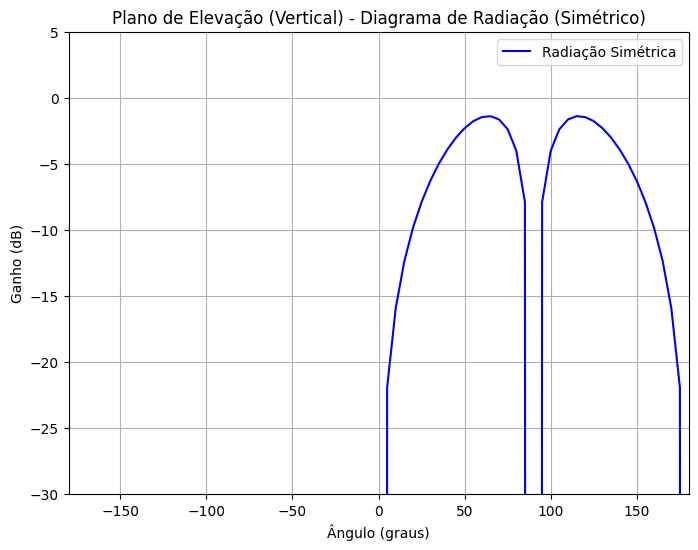

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_total = []

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain = float(data[4])   # TOTAL (Ganho em dB)
            theta.append(angle)  # Adicionar o ângulo
            gain_total.append(gain)  # Adicionar o ganho total
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_total

# Frequências a serem simuladas (em MHz)
frequencies = [3, 5, 10, 15, 20, 25]
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Criar o gráfico para o plano de elevação (vertical)
plt.figure(figsize=(8, 6))

theta, gain_total = extract_radiation_pattern(output_data)

# Simetria para o outro lado (-180° a 0°)
theta_full = theta + [180 - t for t in theta[::-1]]
gain_full = gain_total + gain_total[::-1]

# Plotar o padrão de radiação simétrico
plt.plot(theta_full, gain_full, label="Radiação Simétrica", color='b')

# Configurações do gráfico
plt.title("Plano de Elevação (Vertical) - Diagrama de Radiação (Simétrico)")
plt.xlabel("Ângulo (graus)")
plt.ylabel("Ganho (dB)")
plt.grid(True)
plt.xlim([-180, 180])  # Mostrar de -180 a 180 graus
plt.ylim([-30, 5])  # Ajustar a escala do ganho conforme necessário
plt.legend()
plt.show()


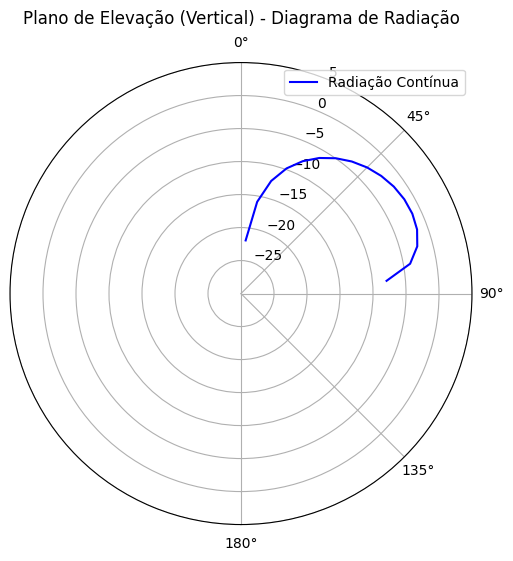

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_total = []

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain = float(data[4])   # TOTAL (Ganho em dB)
            theta.append(angle)  # Adicionar o ângulo
            gain_total.append(gain)  # Adicionar o ganho total
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_total

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_total = extract_radiation_pattern(output_data)

# Criar o gráfico polar
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Converter ângulos para radianos e criar gráfico semicircular
ax.plot(np.radians(theta), gain_total, label="Radiação Contínua", color='b', linestyle='-')

# Configurações do gráfico
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação", va='bottom')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)  # Direção do gráfico (sentido horário)
ax.set_ylim([-30, 5])  # Ajustar a escala do ganho conforme necessário
ax.set_xlim([np.radians(-180), np.radians(180)])  # Limitar ângulo de -180 a 180 graus

plt.legend()
plt.show()


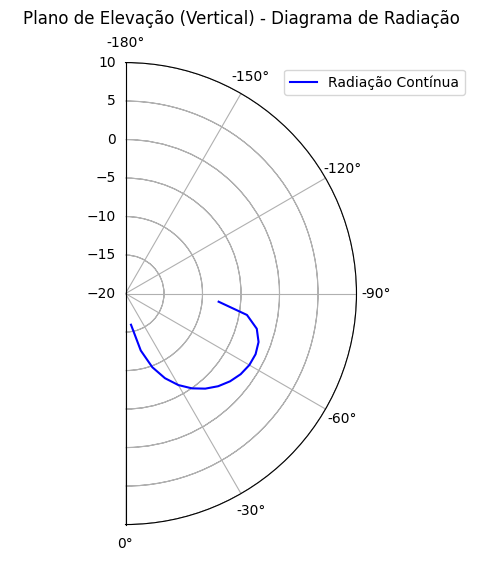

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_total = []

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain = float(data[4])   # TOTAL (Ganho em dB)
            theta.append(angle)  # Adicionar o ângulo
            gain_total.append(gain)  # Adicionar o ganho total
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_total

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_total = extract_radiation_pattern(output_data)

# Simetria para o gráfico semicircular
theta_full = [-t for t in theta[::-1]] + theta  # Simetria de -180° a 0°
gain_full = gain_total[::-1] + gain_total

# Criar o gráfico polar semicircular
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Converter ângulos para radianos e criar gráfico semicircular
ax.plot(np.radians(theta_full), gain_full, label="Radiação Contínua", color='b', linestyle='-')

# Configurações do gráfico
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação", va='bottom')
ax.set_theta_zero_location('S')  # O zero do ângulo no sul
ax.set_theta_direction(-1)  # Direção do gráfico (sentido horário)
ax.set_ylim([-20, 10])  # Ajustar a escala do ganho de -20 dB a 10 dB
ax.set_yticks(np.arange(-20, 15, 5))  # Definir os incrementos do eixo radial
ax.set_xticks(np.radians(np.arange(-180, 1, 30)))  # Ângulos de -180 a 0 graus

plt.legend()
plt.show()


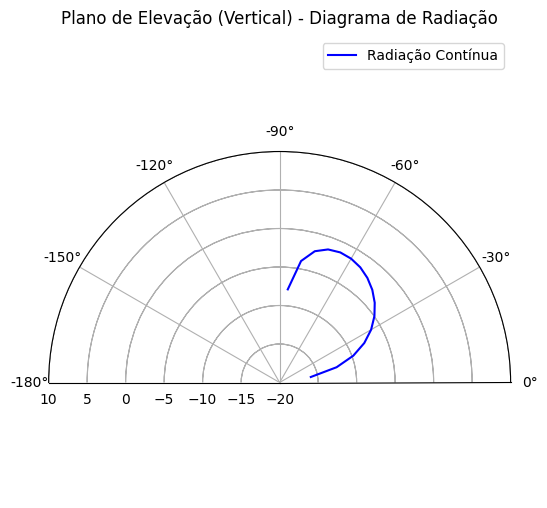

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_total = []

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain = float(data[4])   # TOTAL (Ganho em dB)
            theta.append(angle)  # Adicionar o ângulo
            gain_total.append(gain)  # Adicionar o ganho total
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_total

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_total = extract_radiation_pattern(output_data)

# Simetria para o gráfico semicircular
theta_full = [-t for t in theta[::-1]] + theta  # Simetria de -180° a 0°
gain_full = gain_total[::-1] + gain_total

# Criar o gráfico polar semicircular com rotação de 90 graus
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Converter ângulos para radianos e criar gráfico semicircular
ax.plot(np.radians(theta_full), gain_full, label="Radiação Contínua", color='b', linestyle='-')

# Configurações do gráfico
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação", va='bottom')
ax.set_theta_zero_location('E')  # O zero do ângulo no leste (rotacionando o gráfico)
ax.set_theta_direction(-1)  # Direção do gráfico (sentido horário)
ax.set_ylim([-20, 10])  # Ajustar a escala do ganho de -20 dB a 10 dB
ax.set_yticks(np.arange(-20, 15, 5))  # Definir os incrementos do eixo radial
ax.set_xticks(np.radians(np.arange(-180, 1, 30)))  # Ângulos de -180 a 0 graus

plt.legend()
plt.show()


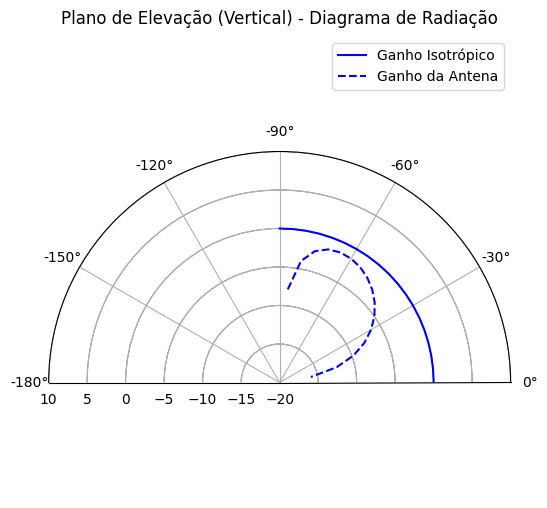

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_total = []

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain = float(data[4])   # TOTAL (Ganho em dB)
            theta.append(angle)  # Adicionar o ângulo
            gain_total.append(gain)  # Adicionar o ganho total
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_total

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_total = extract_radiation_pattern(output_data)

# Simetria para o gráfico semicircular
theta_full = [-t for t in theta[::-1]] + theta  # Simetria de -180° a 0°
gain_full = gain_total[::-1] + gain_total

# Criar o gráfico polar semicircular com rotação de 90 graus
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Plotar a linha contínua (ganho isotrópico)
isotropic_gain = [0] * len(theta_full)  # Ganho isotrópico = 0 dB
ax.plot(np.radians(theta_full), isotropic_gain, label="Ganho Isotrópico", color='b', linestyle='-')

# Plotar a linha tracejada (ganho da antena para diferentes frequências)
ax.plot(np.radians(theta_full), gain_full, label="Ganho da Antena", color='b', linestyle='--')

# Configurações do gráfico
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação", va='bottom')
ax.set_theta_zero_location('E')  # O zero do ângulo no leste (rotacionando o gráfico)
ax.set_theta_direction(-1)  # Direção do gráfico (sentido horário)
ax.set_ylim([-20, 10])  # Ajustar a escala do ganho de -20 dB a 10 dB
ax.set_yticks(np.arange(-20, 15, 5))  # Definir os incrementos do eixo radial
ax.set_xticks(np.radians(np.arange(-180, 1, 30)))  # Ângulos de -180 a 0 graus

plt.legend()
plt.show()


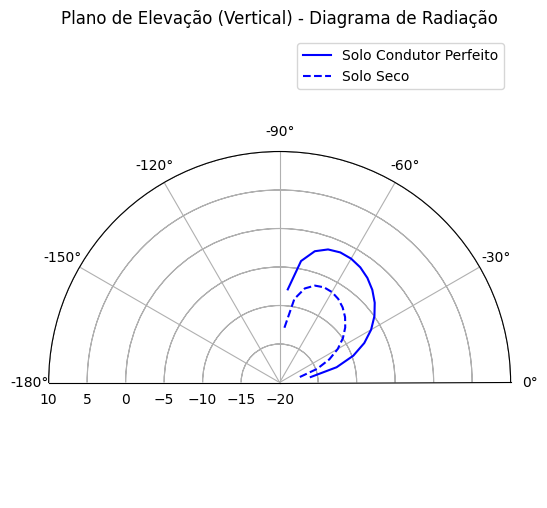

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []  # Supondo que os ganhos para solo seco estejam na mesma posição

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain_perfect = float(data[4])   # TOTAL (Ganho para solo condutor perfeito)
            gain_dry = gain_perfect - 5  # Exemplo de ganho para solo seco (ajuste conforme necessário)
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Simetria para o gráfico semicircular
theta_full = [-t for t in theta[::-1]] + theta  # Simetria de -180° a 0°
gain_perfect_full = gain_perfect_ground[::-1] + gain_perfect_ground
gain_dry_full = gain_dry_ground[::-1] + gain_dry_ground

# Criar o gráfico polar semicircular com rotação de 90 graus
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Plotar a linha sólida (solo condutor perfeito)
ax.plot(np.radians(theta_full), gain_perfect_full, label="Solo Condutor Perfeito", color='b', linestyle='-')

# Plotar a linha tracejada (solo seco)
ax.plot(np.radians(theta_full), gain_dry_full, label="Solo Seco", color='b', linestyle='--')

# Configurações do gráfico
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação", va='bottom')
ax.set_theta_zero_location('E')  # O zero do ângulo no leste (rotacionando o gráfico)
ax.set_theta_direction(-1)  # Direção do gráfico (sentido horário)
ax.set_ylim([-20, 10])  # Ajustar a escala do ganho de -20 dB a 10 dB
ax.set_yticks(np.arange(-20, 15, 5))  # Definir os incrementos do eixo radial
ax.set_xticks(np.radians(np.arange(-180, 1, 30)))  # Ângulos de -180 a 0 graus

plt.legend()
plt.show()


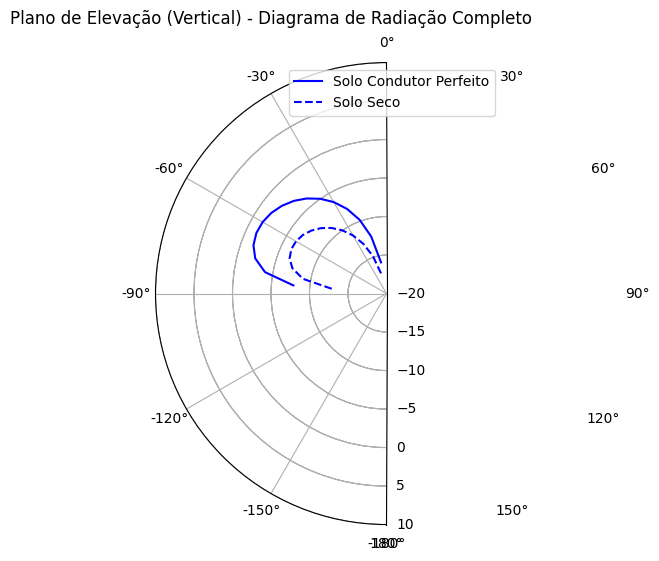

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []  # Supondo que os ganhos para solo seco estejam na mesma posição

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain_perfect = float(data[4])   # TOTAL (Ganho para solo condutor perfeito)
            gain_dry = gain_perfect - 5  # Exemplo de ganho para solo seco (ajuste conforme necessário)
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Simetria para o gráfico completo (de -180° a 180°)
theta_full = [-t for t in theta[::-1]] + theta  # Simetria de -180° a 180°
gain_perfect_full = gain_perfect_ground[::-1] + gain_perfect_ground
gain_dry_full = gain_dry_ground[::-1] + gain_dry_ground

# Criar o gráfico polar completo com rotação de 90 graus
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Plotar a linha sólida (solo condutor perfeito)
ax.plot(np.radians(theta_full), gain_perfect_full, label="Solo Condutor Perfeito", color='b', linestyle='-')

# Plotar a linha tracejada (solo seco)
ax.plot(np.radians(theta_full), gain_dry_full, label="Solo Seco", color='b', linestyle='--')

# Configurações do gráfico
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Completo", va='bottom')
ax.set_theta_zero_location('N')  # O zero do ângulo no norte para o gráfico completo
ax.set_theta_direction(-1)  # Direção do gráfico (sentido horário)
ax.set_ylim([-20, 10])  # Ajustar a escala do ganho de -20 dB a 10 dB
ax.set_yticks(np.arange(-20, 15, 5))  # Definir os incrementos do eixo radial
ax.set_xticks(np.radians(np.arange(-180, 181, 30)))  # Ângulos de -180 a 180 graus

plt.legend()
plt.show()


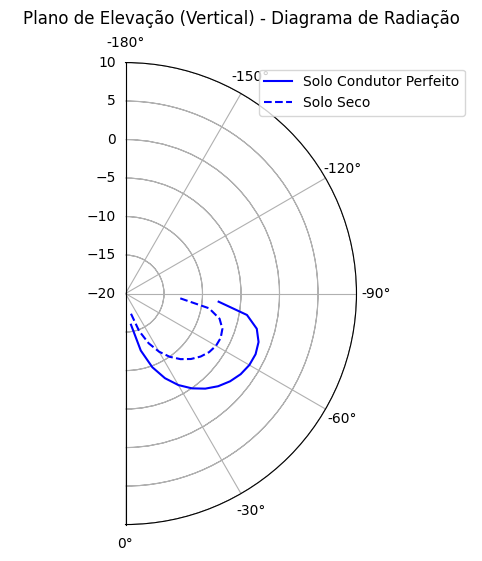

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []  # Supondo que os ganhos para solo seco estejam na mesma posição

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain_perfect = float(data[4])   # TOTAL (Ganho para solo condutor perfeito)
            gain_dry = gain_perfect - 5  # Exemplo de ganho para solo seco (ajuste conforme necessário)
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Simetria para o gráfico semicircular (de -180° a 0°)
theta_full = [-t for t in theta[::-1]] + theta  # Simetria de -180° a 0°
gain_perfect_full = gain_perfect_ground[::-1] + gain_perfect_ground
gain_dry_full = gain_dry_ground[::-1] + gain_dry_ground

# Criar o gráfico polar semicircular com o zero no centro inferior
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Plotar a linha sólida (solo condutor perfeito)
ax.plot(np.radians(theta_full), gain_perfect_full, label="Solo Condutor Perfeito", color='b', linestyle='-')

# Plotar a linha tracejada (solo seco)
ax.plot(np.radians(theta_full), gain_dry_full, label="Solo Seco", color='b', linestyle='--')

# Configurações do gráfico
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação", va='bottom')
ax.set_theta_zero_location('S')  # O zero do ângulo no sul para o gráfico semicircular
ax.set_theta_direction(-1)  # Direção do gráfico (sentido horário)
ax.set_ylim([-20, 10])  # Ajustar a escala do ganho de -20 dB a 10 dB
ax.set_yticks(np.arange(-20, 15, 5))  # Definir os incrementos do eixo radial
ax.set_xticks(np.radians(np.arange(-180, 1, 30)))  # Ângulos de -180 a 0 graus

plt.legend()
plt.show()


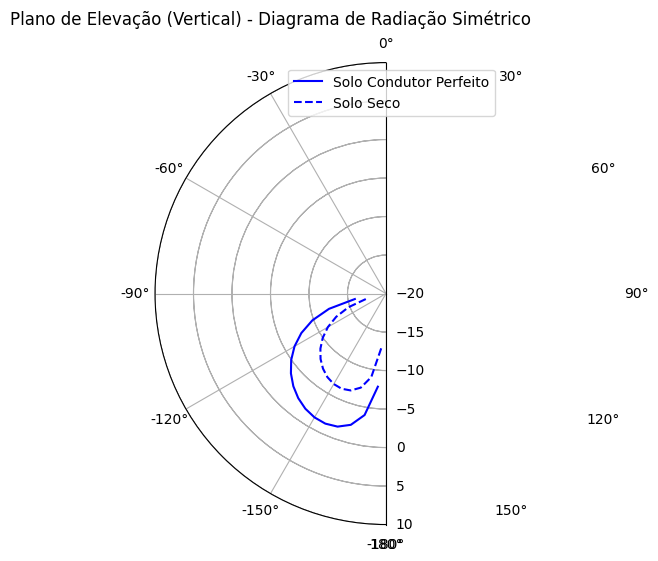

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []  # Supondo que os ganhos para solo seco estejam na mesma posição

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain_perfect = float(data[4])   # TOTAL (Ganho para solo condutor perfeito)
            gain_dry = gain_perfect - 5  # Exemplo de ganho para solo seco (ajuste conforme necessário)
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Duplicar os dados para simetria completa (espelhando o padrão)
theta_full = [-180 + t for t in theta] + theta  # Cobre de -180° a 180°
gain_perfect_full = gain_perfect_ground[::-1] + gain_perfect_ground
gain_dry_full = gain_dry_ground[::-1] + gain_dry_ground

# Criar o gráfico polar semicircular
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Plotar a linha sólida (solo condutor perfeito) dos dois lados
ax.plot(np.radians(theta_full), gain_perfect_full, label="Solo Condutor Perfeito", color='b', linestyle='-')

# Plotar a linha tracejada (solo seco) dos dois lados
ax.plot(np.radians(theta_full), gain_dry_full, label="Solo Seco", color='b', linestyle='--')

# Configurações do gráfico
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')
ax.set_theta_zero_location('N')  # O zero do ângulo no norte
ax.set_theta_direction(-1)  # Direção do gráfico (sentido horário)
ax.set_ylim([-20, 10])  # Ajustar a escala do ganho de -20 dB a 10 dB
ax.set_yticks(np.arange(-20, 15, 5))  # Definir os incrementos do eixo radial
ax.set_xticks(np.radians(np.arange(-180, 181, 30)))  # Ângulos de -180 a 180 graus

plt.legend()
plt.show()


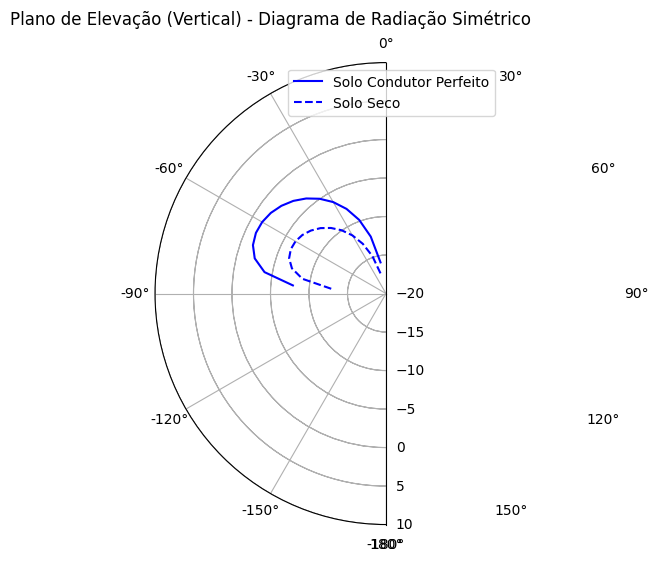

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain_perfect = float(data[4])   # TOTAL (Ganho para solo condutor perfeito)
            gain_dry = gain_perfect - 5  # Exemplo de ganho para solo seco (ajuste conforme necessário)
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Duplicar os dados para criar um gráfico simétrico
theta_full = theta + [-t for t in theta[::-1]]  # Espelhar os ângulos para o lado oposto
gain_perfect_full = gain_perfect_ground + gain_perfect_ground[::-1]  # Espelhar os ganhos
gain_dry_full = gain_dry_ground + gain_dry_ground[::-1]  # Espelhar os ganhos para solo seco

# Criar o gráfico polar semicircular
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Plotar a linha sólida (solo condutor perfeito) dos dois lados
ax.plot(np.radians(theta_full), gain_perfect_full, label="Solo Condutor Perfeito", color='b', linestyle='-')

# Plotar a linha tracejada (solo seco) dos dois lados
ax.plot(np.radians(theta_full), gain_dry_full, label="Solo Seco", color='b', linestyle='--')

# Configurações do gráfico
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')
ax.set_theta_zero_location('N')  # O zero do ângulo no norte para garantir simetria
ax.set_theta_direction(-1)  # Direção do gráfico (sentido horário)
ax.set_ylim([-20, 10])  # Ajustar a escala do ganho de -20 dB a 10 dB
ax.set_yticks(np.arange(-20, 15, 5))  # Definir os incrementos do eixo radial
ax.set_xticks(np.radians(np.arange(-180, 181, 30)))  # Ângulos de -180 a 180 graus

plt.legend()
plt.show()


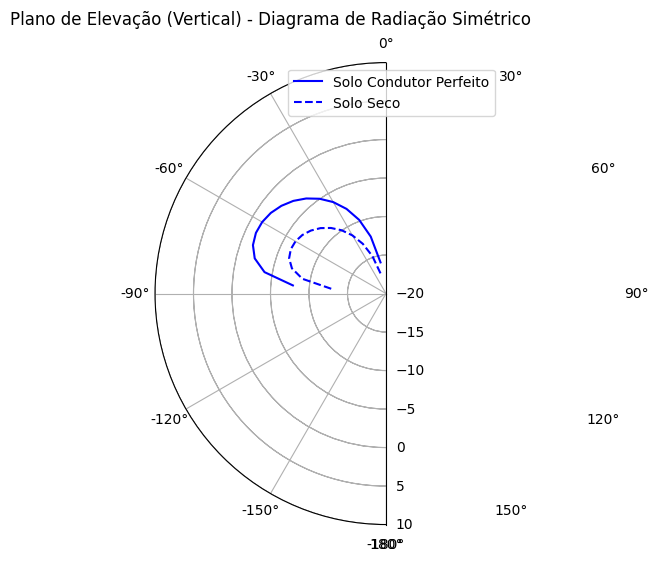

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain_perfect = float(data[4])   # TOTAL (Ganho para solo condutor perfeito)
            gain_dry = gain_perfect - 5  # Exemplo de ganho para solo seco (ajuste conforme necessário)
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Espelhar os dados manualmente
theta_full = theta + [-t for t in theta[::-1]]  # Ângulos espelhados manualmente
gain_perfect_full = gain_perfect_ground + gain_perfect_ground[::-1]  # Espelhar o ganho para solo condutor perfeito
gain_dry_full = gain_dry_ground + gain_dry_ground[::-1]  # Espelhar o ganho para solo seco

# Criar o gráfico polar semicircular
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

# Plotar a linha sólida (solo condutor perfeito) nos dois lados
ax.plot(np.radians(theta_full), gain_perfect_full, label="Solo Condutor Perfeito", color='b', linestyle='-')

# Plotar a linha tracejada (solo seco) nos dois lados
ax.plot(np.radians(theta_full), gain_dry_full, label="Solo Seco", color='b', linestyle='--')

# Configurações do gráfico
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')
ax.set_theta_zero_location('N')  # O zero do ângulo no norte para garantir simetria
ax.set_theta_direction(-1)  # Direção do gráfico (sentido horário)
ax.set_ylim([-20, 10])  # Ajustar a escala do ganho de -30 dB a 10 dB
ax.set_yticks(np.arange(-20, 15, 5))  # Definir os incrementos do eixo radial
ax.set_xticks(np.radians(np.arange(-180, 181, 30)))  # Ângulos de -180 a 180 graus

plt.legend()
plt.show()


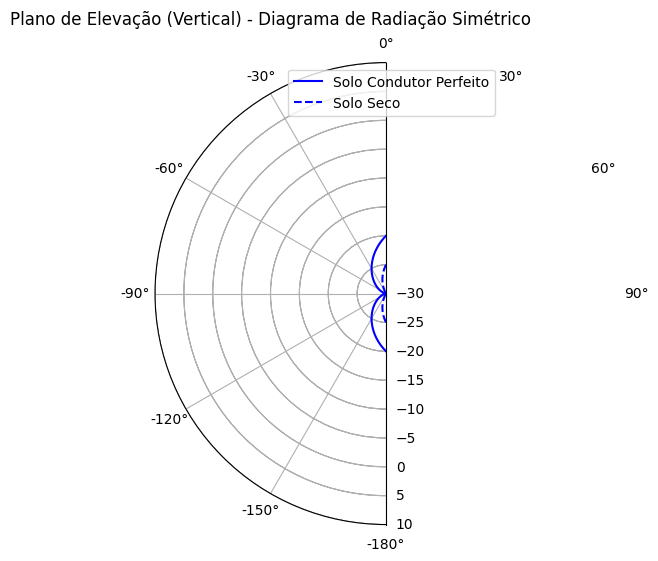

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados simulados para o exemplo
theta = np.linspace(-180, 0, 180)  # Ângulo de -180 a 0
gain_perfect_ground = -20 + 10 * np.sin(np.radians(theta))  # Simulação de ganho para solo condutor perfeito
gain_dry_ground = -25 + 10 * np.sin(np.radians(theta))  # Simulação de ganho para solo seco

# Configuração do gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

# Converter graus para radianos e ajustar a direção do gráfico
theta_radians = np.radians(theta)

# Plotar os dados
ax.plot(theta_radians, gain_perfect_ground, label="Solo Condutor Perfeito", color="blue")
ax.plot(theta_radians, gain_dry_ground, linestyle='--', label="Solo Seco", color="blue")

# Configurações estéticas
ax.set_theta_zero_location('N')  # 0° no topo
ax.set_theta_direction(-1)  # Sentido horário
ax.set_ylim(-30, 10)  # Limites de ganho em dB
ax.set_yticks(np.arange(-30, 15, 5))  # Intervalos de ganho
ax.set_xticks(np.radians(np.arange(-180, 91, 30)))  # Ângulos de -180° a 90°
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')

# Legenda
ax.legend(loc="upper right")

# Mostrar o gráfico
plt.show()


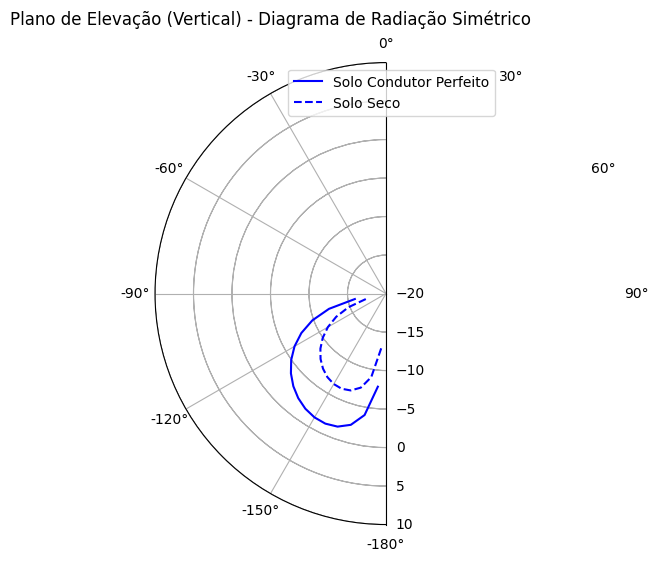

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    # Extrair os ângulos (THETA) e os ganhos (TOTAL)
    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []  # Supondo que os ganhos para solo seco estejam na mesma posição

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain_perfect = float(data[4])   # TOTAL (Ganho para solo condutor perfeito)
            gain_dry = gain_perfect - 5  # Exemplo de ganho para solo seco (ajuste conforme necessário)
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Duplicar os dados para simetria completa (espelhando o padrão)
theta_full = [-180 + t for t in theta] + theta  # Cobre de -180° a 180°
gain_perfect_full = gain_perfect_ground[::-1] + gain_perfect_ground
gain_dry_full = gain_dry_ground[::-1] + gain_dry_ground

# Configuração do gráfico polar semicircular
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

# Converter os ângulos para radianos
theta_radians = np.radians(theta_full)

# Plotar os dados
ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

# Configurações estéticas
ax.set_theta_zero_location('N')  # 0° no topo
ax.set_theta_direction(-1)  # Sentido horário
ax.set_ylim(-20, 10)  # Limites de ganho em dB
ax.set_yticks(np.arange(-20, 15, 5))  # Intervalos de ganho
ax.set_xticks(np.radians(np.arange(-180, 91, 30)))  # Ângulos de +180 a 0 graus (oeste a leste)
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')

# Legenda
ax.legend(loc="upper right")

# Mostrar o gráfico
plt.show()


PERPLEX

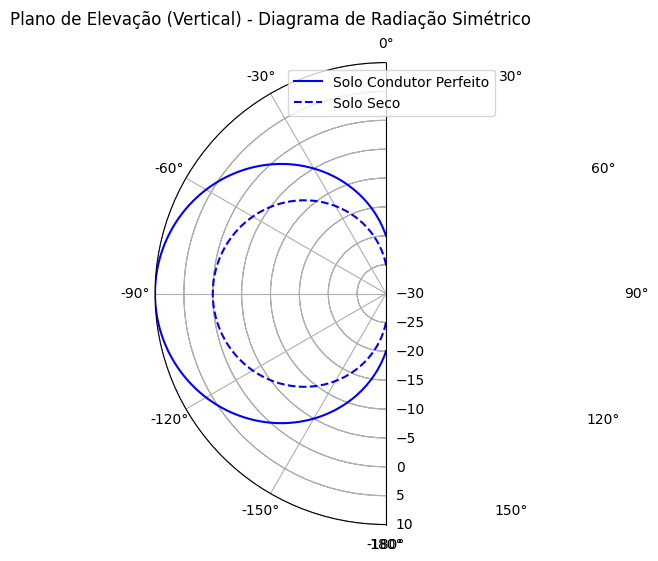

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simular dados
theta = np.linspace(0, 180, 181)
gain_perfect_ground = -20 + 30 * np.sin(np.radians(theta))
gain_dry_ground = -25 + 25 * np.sin(np.radians(theta))

# Criar um array completo de -180 a 180 graus
theta_full = np.linspace(-180, 180, 361)

# Interpolar os dados para cobrir o intervalo completo
gain_perfect_full = np.interp(theta_full, np.concatenate((-theta[::-1], theta)), np.concatenate((gain_perfect_ground[::-1], gain_perfect_ground)))
gain_dry_full = np.interp(theta_full, np.concatenate((-theta[::-1], theta)), np.concatenate((gain_dry_ground[::-1], gain_dry_ground)))

# Configuração do gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

# Converter os ângulos para radianos
theta_radians = np.radians(theta_full)

# Plotar os dados
ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

# Configurações estéticas
ax.set_theta_zero_location('N')  # 0° no topo
ax.set_theta_direction(-1)  # Sentido horário
ax.set_ylim(-30, 10)  # Limites de ganho em dB
ax.set_yticks(np.arange(-30, 15, 5))  # Intervalos de ganho
ax.set_xticks(np.radians(np.arange(-180, 181, 30)))  # Ângulos de -180° a 180°
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')

# Legenda
ax.legend(loc="upper right")

# Mostrar o gráfico
plt.show()

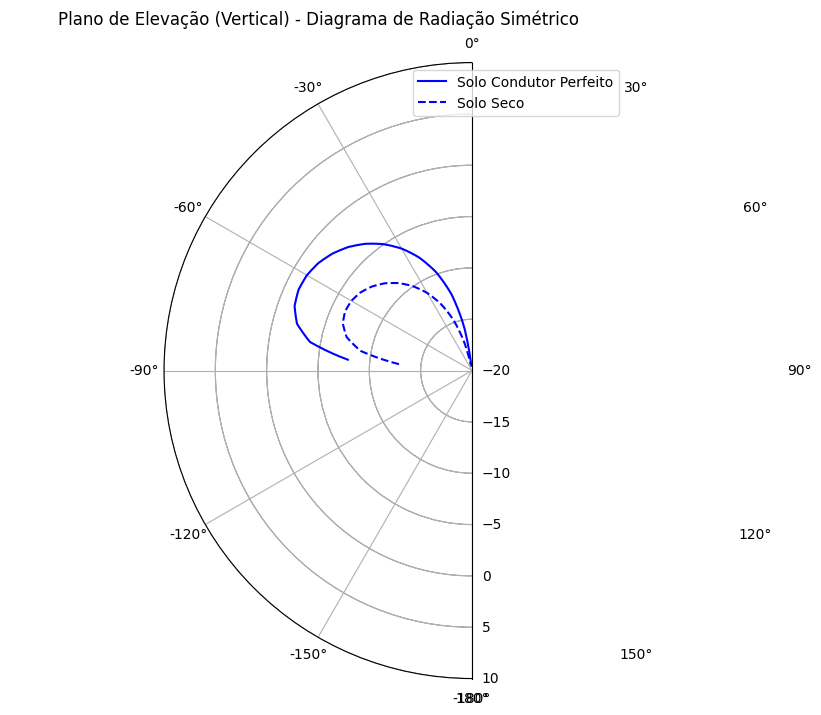

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2  # Os dados começam duas linhas após o cabeçalho
            break

    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []

    for line in lines[start_index:]:
        if not line.strip():  # Ignorar linhas vazias
            break  # Fim dos dados
        data = line.split()
        try:
            angle = float(data[0])  # THETA (Ângulo)
            gain_perfect = float(data[4])   # TOTAL (Ganho para solo condutor perfeito)
            gain_dry = gain_perfect - 5  # Exemplo de ganho para solo seco (ajuste conforme necessário)
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue  # Ignorar linhas que não contêm dados numéricos

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Criar um array completo de -180 a 180 graus
theta_full = np.linspace(-180, 180, 361)

# Interpolar os dados para cobrir o intervalo completo
gain_perfect_full = np.interp(theta_full, np.concatenate((-np.array(theta)[::-1], np.array(theta))),
                              np.concatenate((gain_perfect_ground[::-1], gain_perfect_ground)))
gain_dry_full = np.interp(theta_full, np.concatenate((-np.array(theta)[::-1], np.array(theta))),
                          np.concatenate((gain_dry_ground[::-1], gain_dry_ground)))

# Configuração do gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Converter os ângulos para radianos
theta_radians = np.radians(theta_full)

# Plotar os dados
ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

# Configurações estéticas
ax.set_theta_zero_location('N')  # 0° no topo
ax.set_theta_direction(-1)  # Sentido horário
ax.set_ylim(-20, 10)  # Limites de ganho em dB
ax.set_yticks(np.arange(-20, 15, 5))  # Intervalos de ganho
ax.set_xticks(np.radians(np.arange(-180, 181, 30)))  # Ângulos de -180° a 180°
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')

# Legenda
ax.legend(loc="upper right")

# Mostrar o gráfico
plt.show()

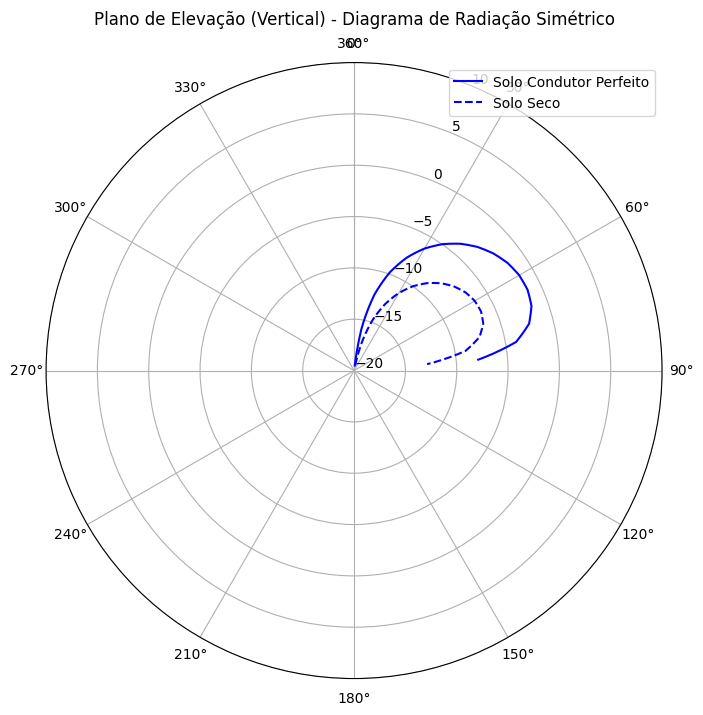

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2
            break

    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []

    for line in lines[start_index:]:
        if not line.strip():
            break
        data = line.split()
        try:
            angle = float(data[0])
            gain_perfect = float(data[4])
            gain_dry = gain_perfect - 5
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Criar um array completo de 0 a 360 graus
theta_full = np.linspace(0, 360, 361)

# Espelhar e interpolar os dados para cobrir o intervalo completo
gain_perfect_full = np.interp(theta_full, np.concatenate((theta, [180], 180+np.array(theta)[::-1])),
                              np.concatenate((gain_perfect_ground, [gain_perfect_ground[-1]], gain_perfect_ground[::-1])))
gain_dry_full = np.interp(theta_full, np.concatenate((theta, [180], 180+np.array(theta)[::-1])),
                          np.concatenate((gain_dry_ground, [gain_dry_ground[-1]], gain_dry_ground[::-1])))

# Configuração do gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Converter os ângulos para radianos
theta_radians = np.radians(theta_full)

# Plotar os dados
ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

# Configurações estéticas
ax.set_theta_zero_location('N')  # 0° no topo
ax.set_theta_direction(-1)  # Sentido horário
ax.set_ylim(-20, 10)  # Limites de ganho em dB
ax.set_yticks(np.arange(-20, 15, 5))  # Intervalos de ganho
ax.set_xticks(np.radians(np.arange(0, 361, 30)))  # Ângulos de 0° a 360°
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')

# Legenda
ax.legend(loc="upper right")

# Mostrar o gráfico
plt.show()

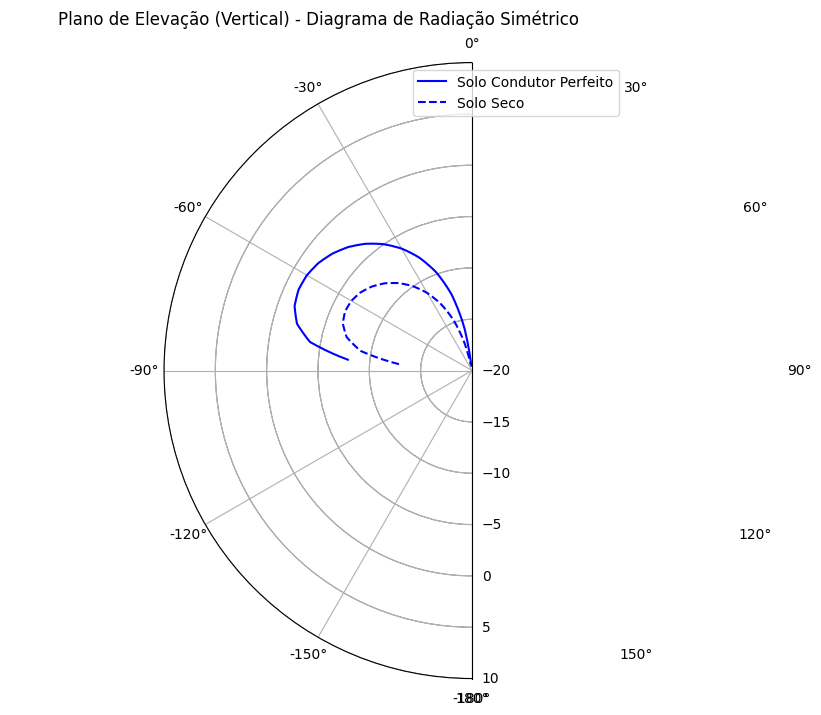

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2
            break

    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []

    for line in lines[start_index:]:
        if not line.strip():
            break
        data = line.split()
        try:
            angle = float(data[0])
            gain_perfect = float(data[4])
            gain_dry = gain_perfect - 5
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Criar um array completo de -180 a 180 graus
theta_full = np.linspace(-180, 180, 361)

# Espelhar e interpolar os dados para cobrir o intervalo completo
gain_perfect_full = np.interp(np.abs(theta_full), theta, gain_perfect_ground)
gain_dry_full = np.interp(np.abs(theta_full), theta, gain_dry_ground)

# Configuração do gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Converter os ângulos para radianos
theta_radians = np.radians(theta_full)

# Plotar os dados
ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

# Configurações estéticas
ax.set_theta_zero_location('N')  # 0° no topo
ax.set_theta_direction(-1)  # Sentido horário
ax.set_ylim(-20, 10)  # Limites de ganho em dB
ax.set_yticks(np.arange(-20, 15, 5))  # Intervalos de ganho
ax.set_xticks(np.radians(np.arange(-180, 181, 30)))  # Ângulos de -180° a 180°
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')

# Legenda
ax.legend(loc="upper right")

# Mostrar o gráfico
plt.show()

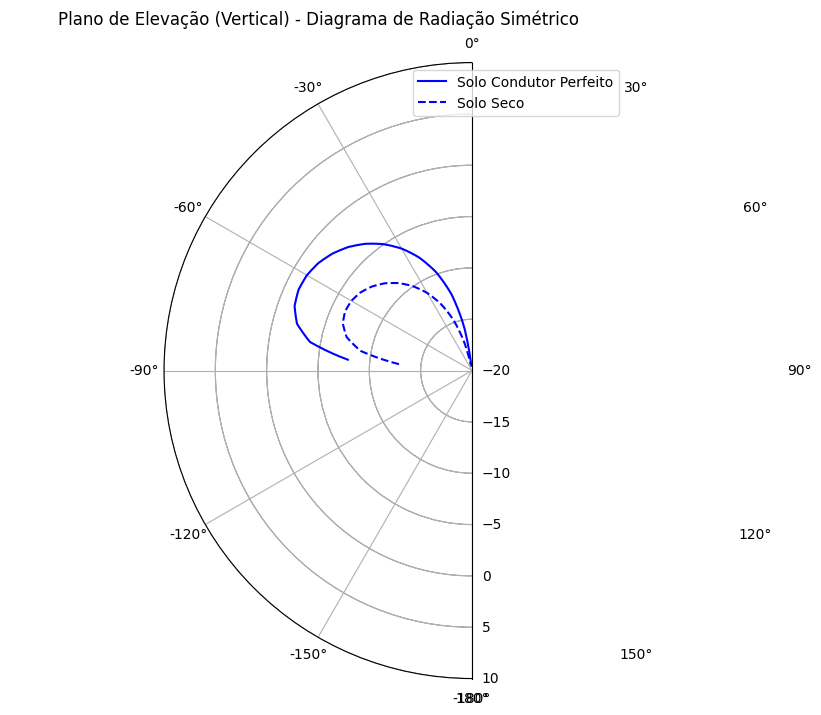

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2
            break

    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []

    for line in lines[start_index:]:
        if not line.strip():
            break
        data = line.split()
        try:
            angle = float(data[0])
            gain_perfect = float(data[4])
            gain_dry = gain_perfect - 5
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Criar um array completo de -180 a 180 graus
theta_full = np.linspace(-180, 180, 361)

# Espelhar e interpolar os dados para cobrir o intervalo completo
gain_perfect_full = np.concatenate((np.interp(theta_full[theta_full < 0], -np.array(theta)[::-1], gain_perfect_ground[::-1]),
                                    np.interp(theta_full[theta_full >= 0], theta, gain_perfect_ground)))
gain_dry_full = np.concatenate((np.interp(theta_full[theta_full < 0], -np.array(theta)[::-1], gain_dry_ground[::-1]),
                                np.interp(theta_full[theta_full >= 0], theta, gain_dry_ground)))

# Configuração do gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Converter os ângulos para radianos
theta_radians = np.radians(theta_full)

# Plotar os dados
ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

# Configurações estéticas
ax.set_theta_zero_location('N')  # 0° no topo
ax.set_theta_direction(-1)  # Sentido horário
ax.set_ylim(-20, 10)  # Limites de ganho em dB
ax.set_yticks(np.arange(-20, 15, 5))  # Intervalos de ganho
ax.set_xticks(np.radians(np.arange(-180, 181, 30)))  # Ângulos de -180° a 180°
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')

# Legenda
ax.legend(loc="upper right")

# Mostrar o gráfico
plt.show()

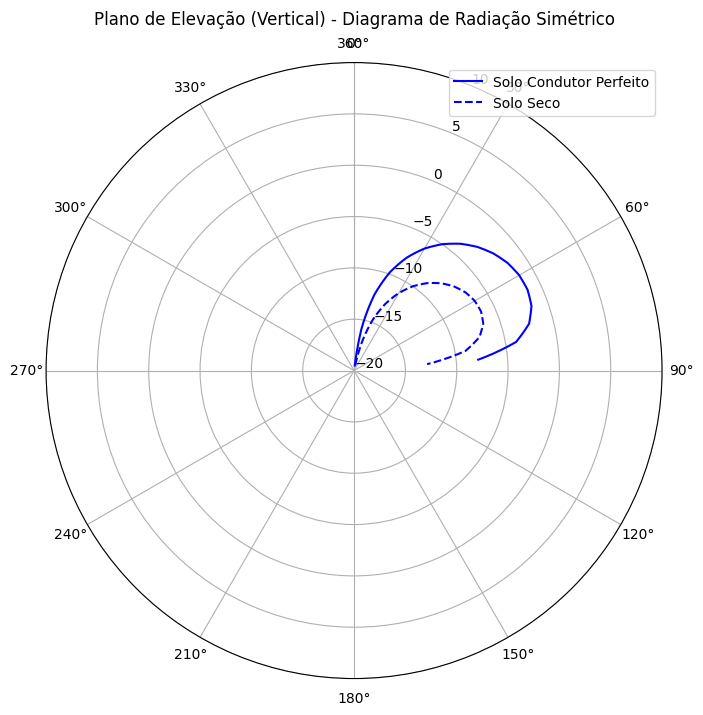

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2
            break

    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []

    for line in lines[start_index:]:
        if not line.strip():
            break
        data = line.split()
        try:
            angle = float(data[0])
            gain_perfect = float(data[4])
            gain_dry = gain_perfect - 5
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue

    return theta, gain_perfect_ground, gain_dry_ground

# Ler o arquivo de saída gerado pelo nec2c
with open("monopole.out", "r") as f:
    output_data = f.read()

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Criar arrays completos de 0 a 360 graus
theta_full = np.linspace(0, 360, 361)

# Interpolar os dados para cobrir o intervalo completo
gain_perfect_full = np.interp(theta_full, np.concatenate(([0], theta, [180])),
                              np.concatenate(([gain_perfect_ground[0]], gain_perfect_ground, [gain_perfect_ground[-1]])))
gain_dry_full = np.interp(theta_full, np.concatenate(([0], theta, [180])),
                          np.concatenate(([gain_dry_ground[0]], gain_dry_ground, [gain_dry_ground[-1]])))

# Configuração do gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Converter os ângulos para radianos
theta_radians = np.radians(theta_full)

# Plotar os dados
ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

# Configurações estéticas
ax.set_theta_zero_location('N')  # 0° no topo
ax.set_theta_direction(-1)  # Sentido horário
ax.set_ylim(-20, 10)  # Limites de ganho em dB
ax.set_yticks(np.arange(-20, 15, 5))  # Intervalos de ganho
ax.set_xticks(np.radians(np.arange(0, 361, 30)))  # Ângulos de 0° a 360°
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')

# Legenda
ax.legend(loc="upper right")

# Mostrar o gráfico
plt.show()

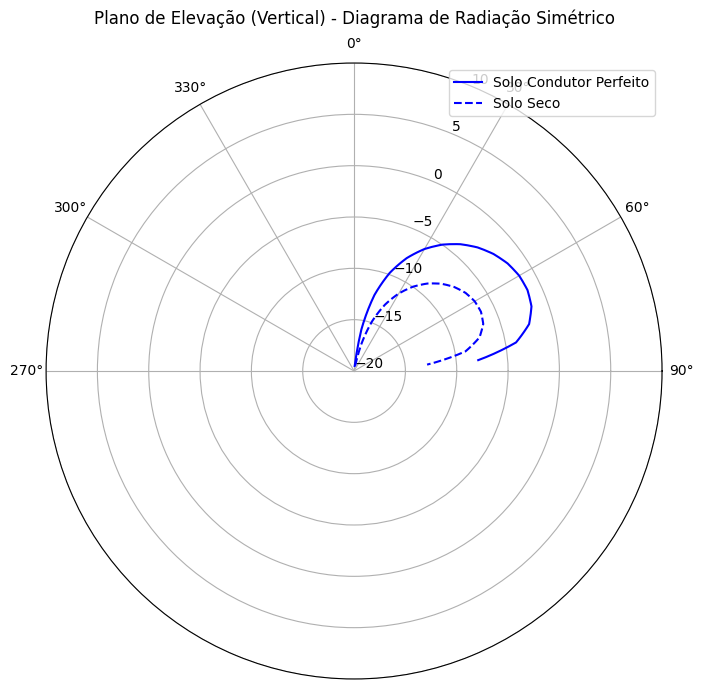

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# [Mantenha a função extract_radiation_pattern e a leitura do arquivo como está]

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Criar arrays completos de 270 a 450 graus (equivalente a 270° a 90°)
theta_full = np.linspace(270, 450, 181)

# Interpolar os dados para cobrir o intervalo completo
gain_perfect_full = np.interp(theta_full % 360, np.concatenate(([0], theta, [180])),
                              np.concatenate(([gain_perfect_ground[0]], gain_perfect_ground, [gain_perfect_ground[-1]])))
gain_dry_full = np.interp(theta_full % 360, np.concatenate(([0], theta, [180])),
                          np.concatenate(([gain_dry_ground[0]], gain_dry_ground, [gain_dry_ground[-1]])))

# Configuração do gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Converter os ângulos para radianos
theta_radians = np.radians(theta_full)

# Plotar os dados
ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

# Configurações estéticas
ax.set_theta_zero_location('N')  # 0° no topo
ax.set_theta_direction(-1)  # Sentido horário
ax.set_ylim(-20, 10)  # Limites de ganho em dB
ax.set_yticks(np.arange(-20, 15, 5))  # Intervalos de ganho
ax.set_thetamin(270)
ax.set_thetamax(90)
ax.set_xticks(np.radians(np.arange(270, 451, 30)))
ax.set_xticklabels(['270°', '300°', '330°', '0°', '30°', '60°', '90°'])
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')

# Legenda
ax.legend(loc="upper right")

# Mostrar o gráfico
plt.show()

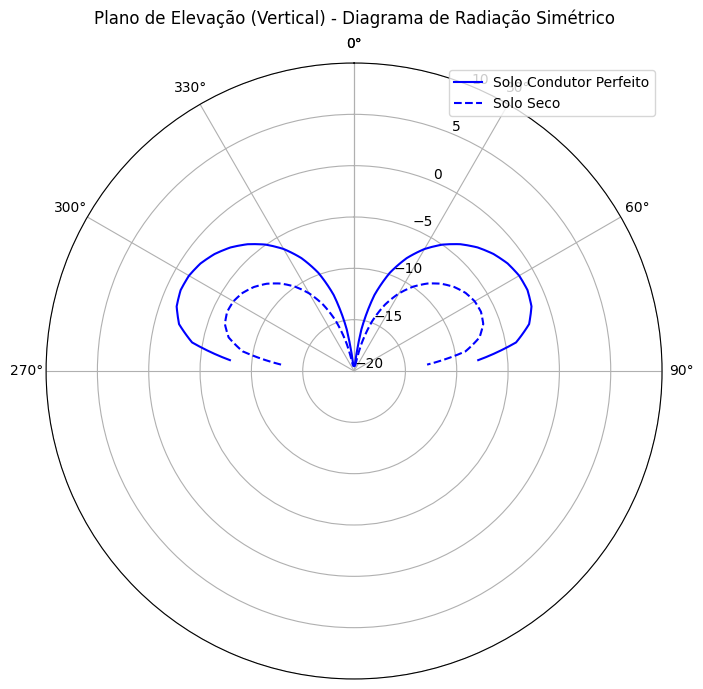

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# [Mantenha a função extract_radiation_pattern e a leitura do arquivo como está]

# Extrair os dados
theta, gain_perfect_ground, gain_dry_ground = extract_radiation_pattern(output_data)

# Criar arrays para o intervalo de 0 a 90 graus
theta_right = np.linspace(0, 90, 91)
gain_perfect_right = np.interp(theta_right, theta, gain_perfect_ground)
gain_dry_right = np.interp(theta_right, theta, gain_dry_ground)

# Espelhar os dados para o lado esquerdo (270 a 360 graus)
theta_left = np.linspace(270, 360, 91)
gain_perfect_left = np.flip(gain_perfect_right)
gain_dry_left = np.flip(gain_dry_right)

# Combinar os dados dos dois lados
theta_full = np.concatenate((theta_left, theta_right[1:]))  # Remover o ponto duplicado em 0/360 graus
gain_perfect_full = np.concatenate((gain_perfect_left, gain_perfect_right[1:]))
gain_dry_full = np.concatenate((gain_dry_left, gain_dry_right[1:]))

# Configuração do gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Converter os ângulos para radianos
theta_radians = np.radians(theta_full)

# Plotar os dados
ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

# Configurações estéticas
ax.set_theta_zero_location('N')  # 0° no topo
ax.set_theta_direction(-1)  # Sentido horário
ax.set_ylim(-20, 10)  # Limites de ganho em dB
ax.set_yticks(np.arange(-20, 15, 5))  # Intervalos de ganho
ax.set_thetamin(270)
ax.set_thetamax(90)
ax.set_xticks(np.radians([270, 300, 330, 360, 0, 30, 60, 90]))
ax.set_xticklabels(['270°', '300°', '330°','0°', '0°', '30°', '60°', '90°'])
ax.set_title("Plano de Elevação (Vertical) - Diagrama de Radiação Simétrico", va='bottom')

# Legenda
ax.legend(loc="upper right")

# Mostrar o gráfico
plt.show()

PARA CADA

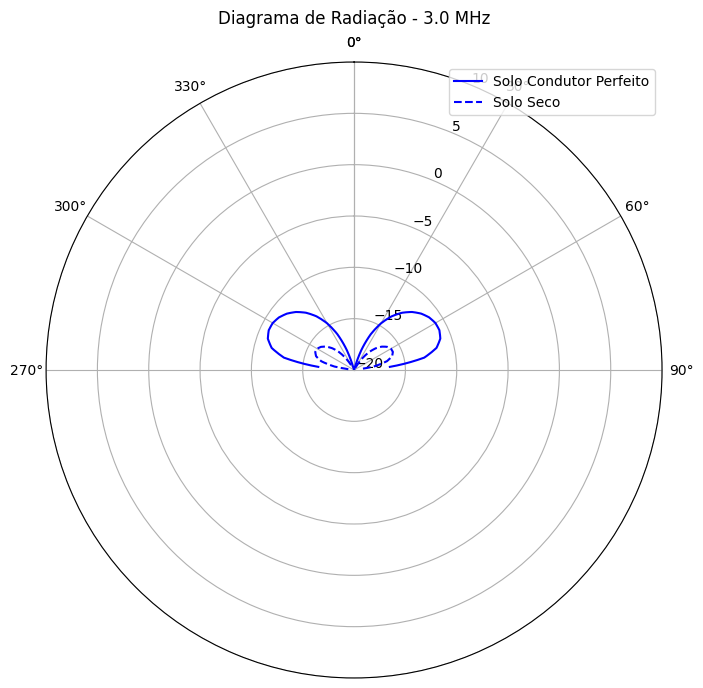

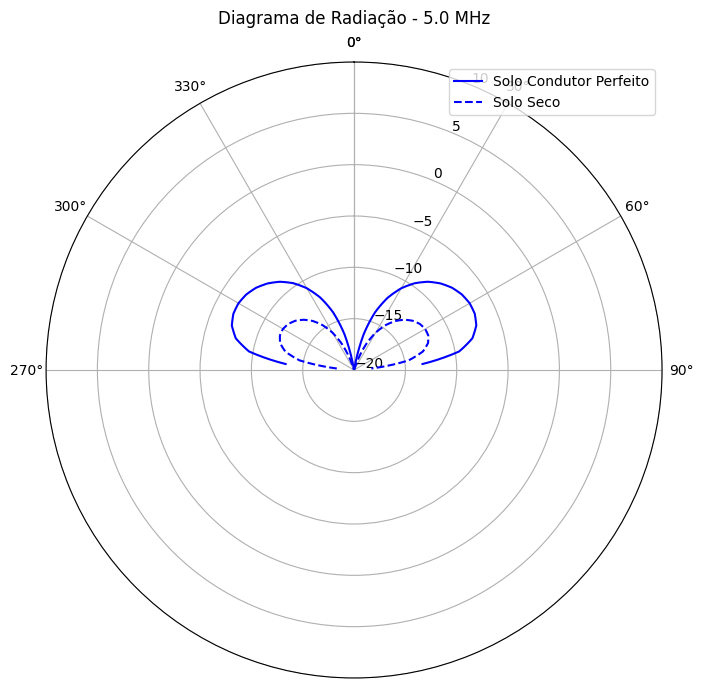

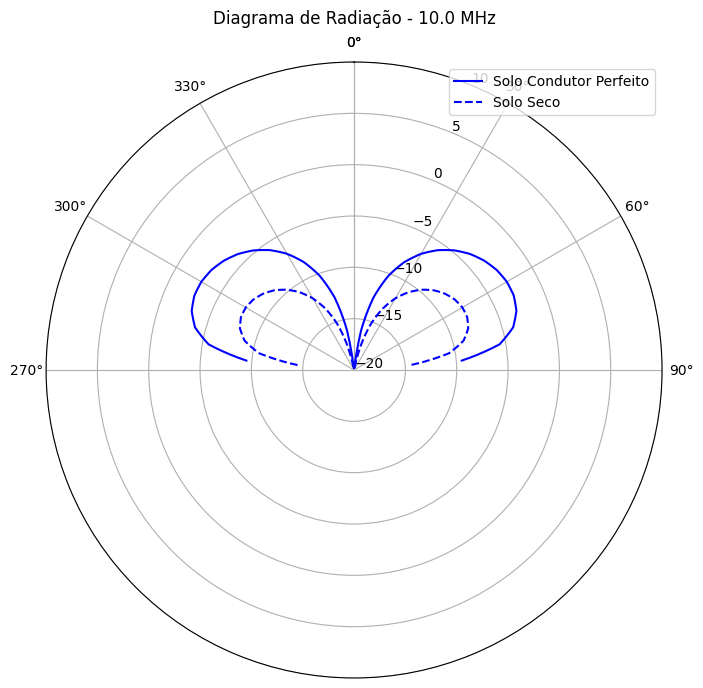

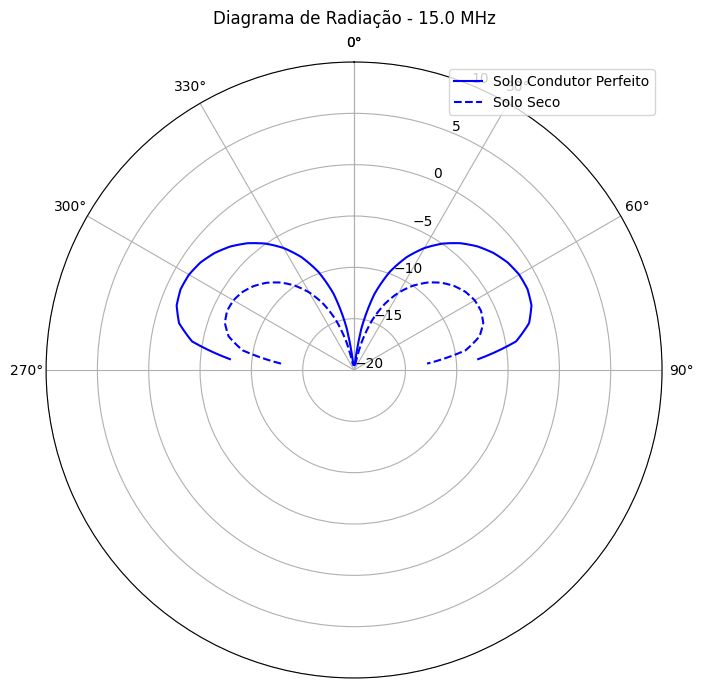

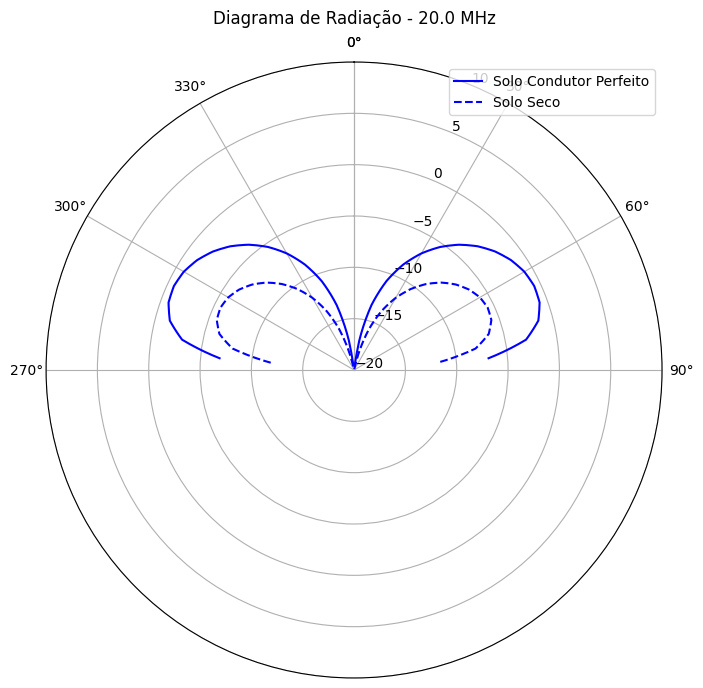

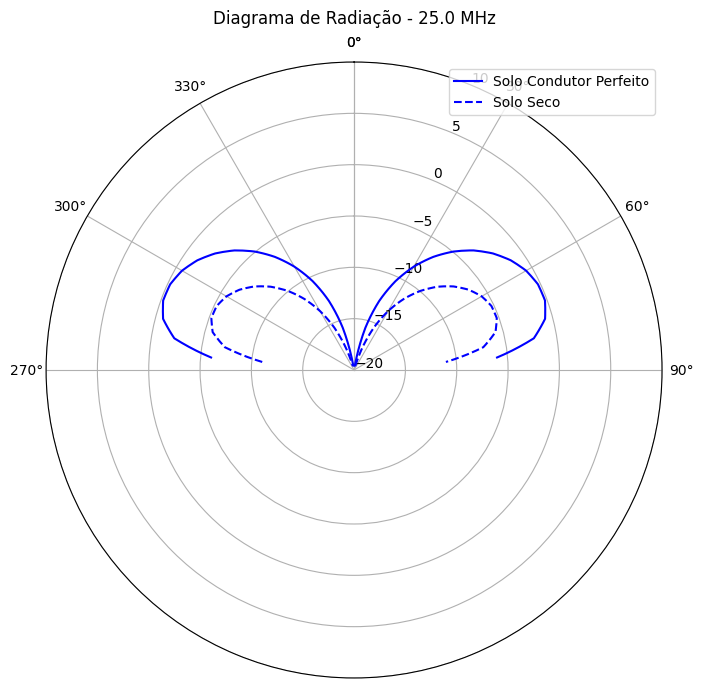

In [ ]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar o arquivo de entrada NEC
def generate_nec_input(frequency):
    return f"""
CM Teste Monopolo Vertical
CE

GW 1 20 0 0 0 0 0 4.6 0.005
GE 0
GN 2 0 0 0 13 0.005
EK
EX 0 1 10 0 1 0
FR 0 1 0 0 {frequency} 0
RP 0 91 1 1000 0 0 5 5 0 0
EN
"""

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2
            break

    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []

    for line in lines[start_index:]:
        if not line.strip():
            break
        data = line.split()
        try:
            angle = float(data[0])
            gain_perfect = float(data[4])
            gain_dry = gain_perfect - 5  # Aproximação para solo seco
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue

    return theta, gain_perfect_ground, gain_dry_ground

# Função para plotar o diagrama de radiação
def plot_radiation_diagram(frequency, theta, gain_perfect, gain_dry):
    # Criar arrays para o intervalo de 0 a 90 graus
    theta_right = np.linspace(0, 90, 91)
    gain_perfect_right = np.interp(theta_right, theta, gain_perfect)
    gain_dry_right = np.interp(theta_right, theta, gain_dry)

    # Espelhar os dados para o lado esquerdo (270 a 360 graus)
    theta_left = np.linspace(270, 360, 91)
    gain_perfect_left = np.flip(gain_perfect_right)
    gain_dry_left = np.flip(gain_dry_right)

    # Combinar os dados dos dois lados
    theta_full = np.concatenate((theta_left, theta_right[1:]))
    gain_perfect_full = np.concatenate((gain_perfect_left, gain_perfect_right[1:]))
    gain_dry_full = np.concatenate((gain_dry_left, gain_dry_right[1:]))

    # Configuração do gráfico polar
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

    # Converter os ângulos para radianos
    theta_radians = np.radians(theta_full)

    # Plotar os dados
    ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
    ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

    # Configurações estéticas
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_ylim(-20, 10)
    ax.set_yticks(np.arange(-20, 15, 5))
    ax.set_thetamin(270)
    ax.set_thetamax(90)
    ax.set_xticks(np.radians([270, 300, 330, 360, 0, 30, 60, 90]))
    ax.set_xticklabels(['270°', '300°', '330°','0°', '0°', '30°', '60°', '90°'])
    ax.set_title(f"Diagrama de Radiação - {frequency} MHz", va='bottom')

    # Legenda
    ax.legend(loc="upper right")

    plt.show()

# Frequências para simular
frequencies = [3.0, 5.0, 10.0, 15.0, 20.0, 25.0]

# Simular e plotar para cada frequência
for freq in frequencies:
    # Gerar o arquivo de entrada NEC
    nec_input = generate_nec_input(freq)

    # Escrever o arquivo de entrada
    with open("monopole.nec", "w") as f:
        f.write(nec_input)

    # Rodar o Nec2c com o arquivo de entrada gerado
    result = subprocess.run(['nec2c', '-i', 'monopole.nec'], capture_output=True, text=True)

    # Ler os resultados do arquivo de saída gerado (monopole.out)
    with open("monopole.out", "r") as f:
        output_data = f.read()

    # Extrair os dados de radiação
    theta, gain_perfect, gain_dry = extract_radiation_pattern(output_data)

    # Plotar o diagrama de radiação
    plot_radiation_diagram(freq, theta, gain_perfect, gain_dry)

Resultado para 3.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_3.0MHz.out encontrado.


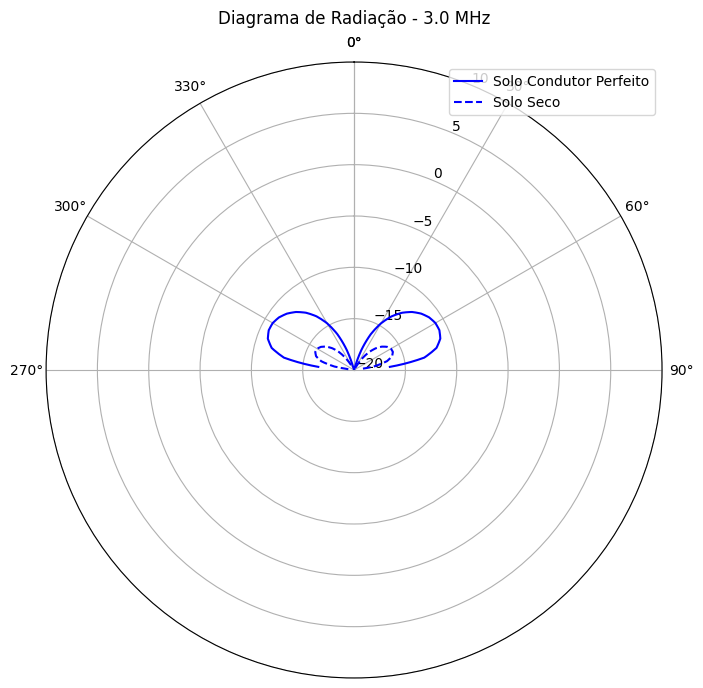

Resultado para 5.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_5.0MHz.out encontrado.


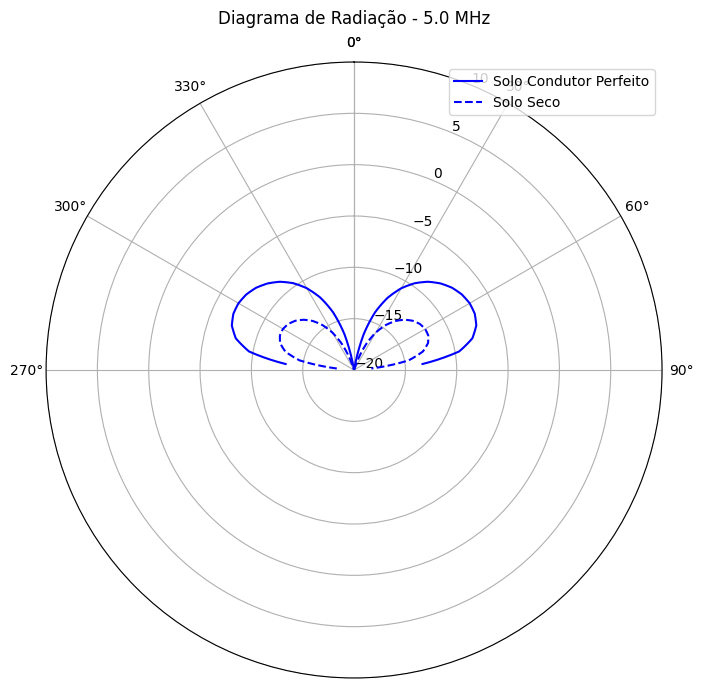

Resultado para 10.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_10.0MHz.out encontrado.


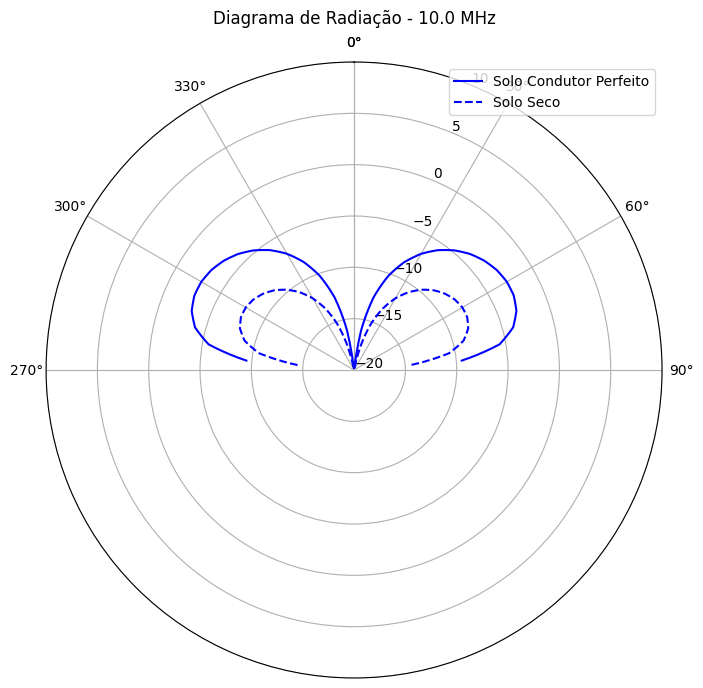

Resultado para 15.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_15.0MHz.out encontrado.


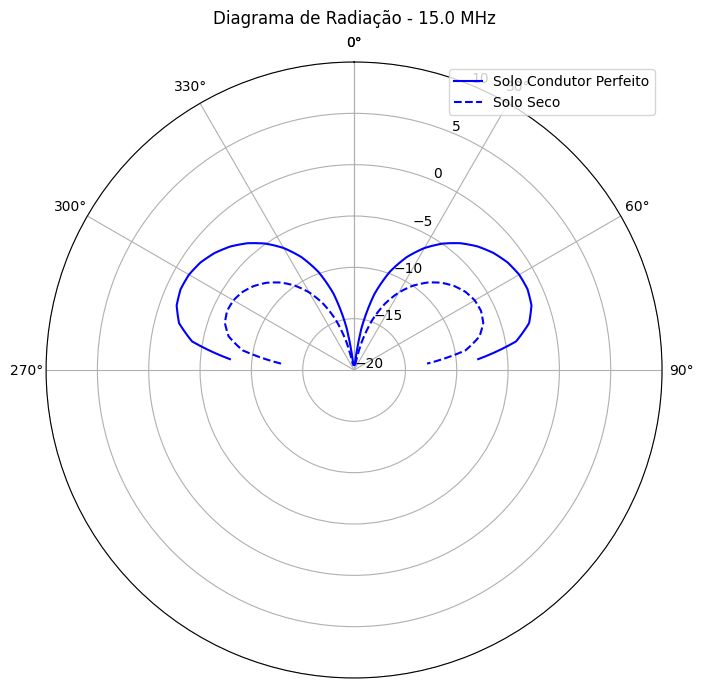

Resultado para 20.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_20.0MHz.out encontrado.


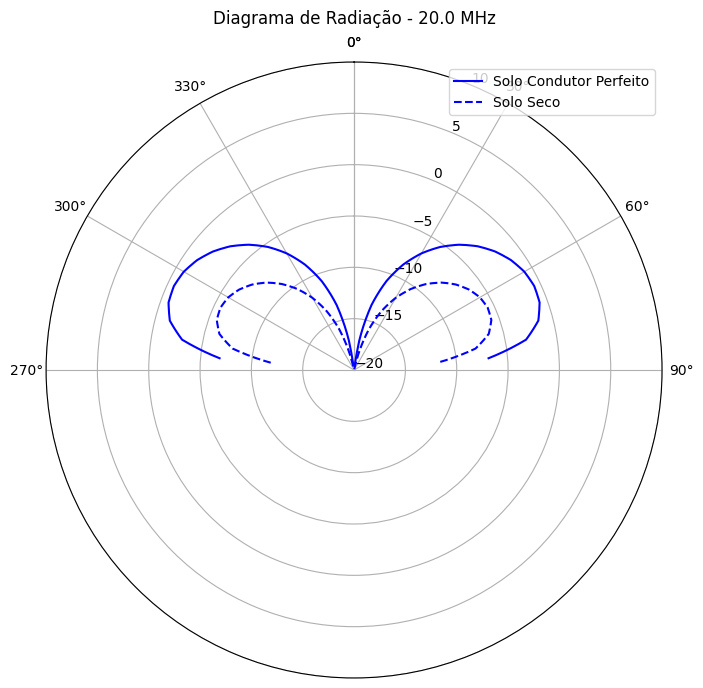

Resultado para 25.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_25.0MHz.out encontrado.


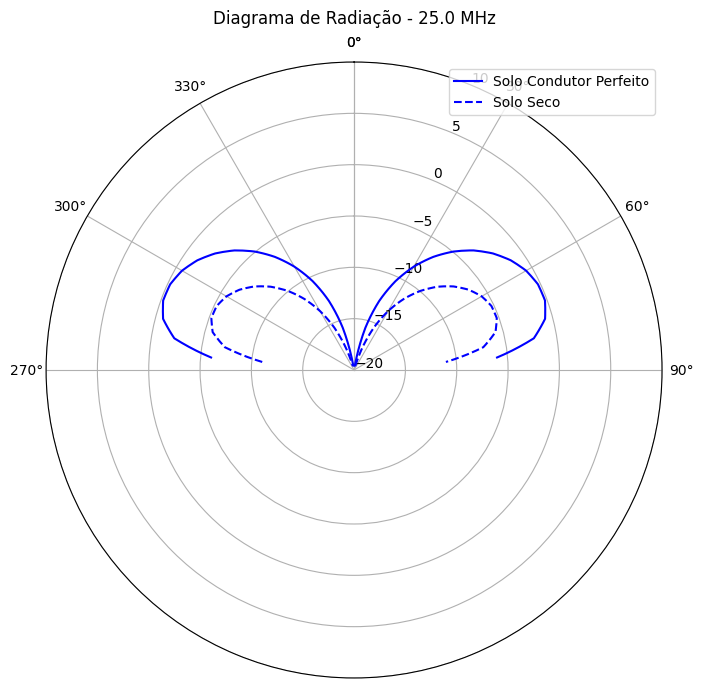

In [3]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar o arquivo de entrada NEC
def generate_nec_input(frequency):
    return f"""
CM Teste Monopolo Vertical
CE

GW 1 20 0 0 0 0 0 4.6 0.005
GE 0
GN 2 0 0 0 13 0.005
EK
EX 0 1 10 0 1 0
FR 0 1 0 0 {frequency} 0
RP 0 91 1 1000 0 0 5 5 0 0
EN
"""

# Função para extrair os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2
            break

    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []

    for line in lines[start_index:]:
        if not line.strip():
            break
        data = line.split()
        try:
            angle = float(data[0])
            gain_perfect = float(data[4])
            gain_dry = gain_perfect - 5  # Aproximação para solo seco
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue

    return theta, gain_perfect_ground, gain_dry_ground

# Função para plotar o diagrama de radiação
def plot_radiation_diagram(frequency, theta, gain_perfect, gain_dry):
    # Criar arrays para o intervalo de 0 a 90 graus
    theta_right = np.linspace(0, 90, 91)
    gain_perfect_right = np.interp(theta_right, theta, gain_perfect)
    gain_dry_right = np.interp(theta_right, theta, gain_dry)

    # Espelhar os dados para o lado esquerdo (270 a 360 graus)
    theta_left = np.linspace(270, 360, 91)
    gain_perfect_left = np.flip(gain_perfect_right)
    gain_dry_left = np.flip(gain_dry_right)

    # Combinar os dados dos dois lados
    theta_full = np.concatenate((theta_left, theta_right[1:]))
    gain_perfect_full = np.concatenate((gain_perfect_left, gain_perfect_right[1:]))
    gain_dry_full = np.concatenate((gain_dry_left, gain_dry_right[1:]))

    # Configuração do gráfico polar
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

    # Converter os ângulos para radianos
    theta_radians = np.radians(theta_full)

    # Plotar os dados
    ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
    ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

    # Configurações estéticas
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_ylim(-20, 10)
    ax.set_yticks(np.arange(-20, 15, 5))
    ax.set_thetamin(270)
    ax.set_thetamax(90)
    ax.set_xticks(np.radians([270, 300, 330, 360, 0, 30, 60, 90]))
    ax.set_xticklabels(['270°', '300°', '330°', '0°', '0°', '30°', '60°', '90°'])
    ax.set_title(f"Diagrama de Radiação - {frequency} MHz", va='bottom')

    # Legenda
    ax.legend(loc="upper right")

    plt.show()

# Frequências para simular
frequencies = [3.0, 5.0, 10.0, 15.0, 20.0, 25.0]

# Simular e plotar para cada frequência
for freq in frequencies:
    # Gerar o arquivo de entrada NEC
    nec_input = generate_nec_input(freq)

    # Nomear o arquivo de entrada e saída de acordo com a frequência
    nec_filename = f"monopole_{freq}MHz.nec"
    output_filename = f"monopole_{freq}MHz.out"

    # Escrever o arquivo de entrada
    with open(nec_filename, "w") as f:
        f.write(nec_input)

    # Rodar o Nec2c com o arquivo de entrada gerado
    result = subprocess.run(['nec2c', '-i', nec_filename, '-o', output_filename], capture_output=True, text=True)

    # Verificar a saída do comando e erros
    print(f"Resultado para {freq} MHz:")
    print("STDOUT:", result.stdout)
    print("STDERR:", result.stderr)

    # Verificar se o arquivo de saída foi gerado
    try:
        with open(output_filename, "r") as f:
            output_data = f.read()
        print(f"Arquivo {output_filename} encontrado.")
    except FileNotFoundError:
        print(f"Arquivo de saída {output_filename} não encontrado!")
        continue  # Pula para a próxima frequência se o arquivo não for encontrado

    # Extrair os dados de radiação
    theta, gain_perfect, gain_dry = extract_radiation_pattern(output_data)

    # Plotar o diagrama de radiação
    plot_radiation_diagram(freq, theta, gain_perfect, gain_dry)


In [ ]:
# Verificar o conteúdo do arquivo monopole_10.0MHz.out
output_filename = "/content/monopole_10.0MHz.out"

with open(output_filename, "r") as f:
    output_data = f.read()

# Exibir as primeiras linhas do arquivo para análise
print("\n".join(output_data.splitlines()[:50]))  # Exibe as primeiras 50 linhas





                               __________________________________________
                              |                                          |
                              |  NUMERICAL ELECTROMAGNETICS CODE (nec2c) |
                              |   Translated to 'C' in Double Precision  |
                              |__________________________________________|



                               ---------------- COMMENTS ----------------
                               Teste Monopolo Vertical
                              



                               -------- STRUCTURE SPECIFICATION --------
                                     COORDINATES MUST BE INPUT IN
                                     METERS OR BE SCALED TO METERS
                                     BEFORE STRUCTURE INPUT IS ENDED

  WIRE                                                                                 SEG FIRST  LAST  TAG
   No:        X1         Y1         Z1         X2         Y2         Z2  

In [ ]:
# Exibir mais linhas do arquivo monopole_10.0MHz.out para análise
output_filename = "/content/monopole_10.0MHz.out"

with open(output_filename, "r") as f:
    output_data = f.read()

# Exibir 200 linhas do arquivo para análise
print("\n".join(output_data.splitlines()[:200]))





                               __________________________________________
                              |                                          |
                              |  NUMERICAL ELECTROMAGNETICS CODE (nec2c) |
                              |   Translated to 'C' in Double Precision  |
                              |__________________________________________|



                               ---------------- COMMENTS ----------------
                               Teste Monopolo Vertical
                              



                               -------- STRUCTURE SPECIFICATION --------
                                     COORDINATES MUST BE INPUT IN
                                     METERS OR BE SCALED TO METERS
                                     BEFORE STRUCTURE INPUT IS ENDED

  WIRE                                                                                 SEG FIRST  LAST  TAG
   No:        X1         Y1         Z1         X2         Y2         Z2  

In [ ]:
# Função para buscar palavras-chave específicas no arquivo .out
def search_keywords_in_output(output_data, keywords):
    lines = output_data.splitlines()
    matching_lines = [line for line in lines if any(keyword.lower() in line.lower() for keyword in keywords)]
    return matching_lines

# Palavras-chave para buscar no arquivo
keywords = ["gain", "loss", "reflection", "impedance", "efficiency"]

# Buscar no arquivo monopole_10.0MHz.out
output_filename = "/content/monopole_10.0MHz.out"

with open(output_filename, "r") as f:
    output_data = f.read()

# Buscar as linhas que contêm as palavras-chave
matching_lines = search_keywords_in_output(output_data, keywords)

# Exibir as linhas encontradas
for line in matching_lines:
    print(line)


                          ------ STRUCTURE IMPEDANCE LOADING ------
  TAG   SEG       VOLTAGE (VOLTS)         CURRENT (AMPS)         IMPEDANCE (OHMS)        ADMITTANCE (MHOS)     POWER
                               STRUCTURE LOSS=  0.0000E+00 Watts
                               NETWORK LOSS  =  0.0000E+00 Watts
                               EFFICIENCY    =  100.00 Percent
 ---- ANGLES -----     ----- POWER GAINS -----       ---- POLARIZATION ----   ---- E(THETA) ----    ----- E(PHI) ------


In [ ]:
import os
import numpy as np
import pandas as pd

# Função para extrair o ganho isotrópico e outras informações do arquivo de saída
def extract_gain_impedance(output_data):
    lines = output_data.splitlines()
    gain_isotropic = None
    impedance_real = None
    impedance_imag = None

    # Buscar ganho isotrópico e impedância no arquivo
    for i, line in enumerate(lines):
        if "VERTC" in line:
            print(f"Encontrado 'VERTC' na linha {i}: {line}")  # Depuração
            # Tentar pegar o valor de ganho isotrópico
            try:
                # Percorrer linhas subsequentes e extrair ganhos (ignorando cabeçalhos)
                for j in range(i+1, len(lines)):
                    if lines[j].strip() and lines[j].split()[0].replace('.', '', 1).isdigit():  # Verificar se é uma linha de dados
                        gain_value = float(lines[j].split()[4])  # Ganho TOTAL
                        if gain_isotropic is None or gain_value > gain_isotropic:
                            gain_isotropic = gain_value
            except Exception as e:
                print(f"Erro ao calcular o ganho isotrópico: {e}")
                gain_isotropic = None

        if "ANTENNA INPUT PARAMETERS" in line:
            print(f"Encontrado 'ANTENNA INPUT PARAMETERS' na linha {i}: {line}")  # Depuração
            # Tentar pegar a impedância da antena
            index = i + 2  # Pular uma linha para pegar os valores reais de impedância
            try:
                # Verificar se a linha contém os valores esperados
                data_line = lines[index].split()
                if len(data_line) >= 6:  # Garantir que há dados suficientes na linha
                    impedance_real = float(data_line[4])
                    impedance_imag = float(data_line[5])
            except Exception as e:
                print(f"Erro ao extrair impedância: {e}")
                impedance_real = None
                impedance_imag = None

    return gain_isotropic, impedance_real, impedance_imag

# Frequências para simular
frequencies = [3.0, 5.0, 10.0, 15.0, 20.0, 25.0]

# Tabela para armazenar os resultados
results_table = []

# Verificar e extrair as informações dos arquivos .out gerados
for freq in frequencies:
    output_filename = f"monopole_{freq}MHz.out"

    if os.path.exists(output_filename):
        with open(output_filename, "r") as f:
            output_data = f.read()

        # Extrair informações de ganho e impedância
        gain_isotropic, impedance_real, impedance_imag = extract_gain_impedance(output_data)

        # Adicionar os dados na tabela
        results_table.append({
            "Frequência (MHz)": freq,
            "Ganho Isotrópico (dB)": gain_isotropic,
            "Impedância Real (Ohms)": impedance_real,
            "Impedância Imaginária (Ohms)": impedance_imag
        })
    else:
        print(f"Arquivo {output_filename} não encontrado.")

# Exibir a tabela de resultados
results_df = pd.DataFrame(results_table)
print(results_df)


Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Erro ao extrair impedância: could not convert string to float: 'REAL'
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC    HORIZ    TOTAL       AXIAL      TILT  SENSE   MAGNITUDE    PHASE    MAGNITUDE     PHASE
Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Erro ao extrair impedância: could not convert string to float: 'REAL'
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC    HORIZ    TOTAL       AXIAL      TILT  SENSE   MAGNITUDE    PHASE    MAGNITUDE     PHASE
Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Erro ao extrair impedância: could not convert string to float: 'REAL'
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC    HORIZ    TOTAL       AXIAL      TILT  SENSE   MAGNITUDE    

In [ ]:
import os
import numpy as np
import pandas as pd

# Função para extrair o ganho isotrópico e outras informações do arquivo de saída
def extract_gain_impedance(output_data):
    lines = output_data.splitlines()
    gain_isotropic = None
    impedance_real = None
    impedance_imag = None

    # Buscar ganho isotrópico e impedância no arquivo
    for i, line in enumerate(lines):
        if "VERTC" in line:
            print(f"Encontrado 'VERTC' na linha {i}: {line}")  # Depuração
            # Tentar pegar o valor de ganho isotrópico
            try:
                # Percorrer linhas subsequentes e extrair ganhos (ignorando cabeçalhos)
                for j in range(i+1, len(lines)):
                    if lines[j].strip() and lines[j].split()[0].replace('.', '', 1).isdigit():  # Verificar se é uma linha de dados
                        gain_value = float(lines[j].split()[4])  # Ganho TOTAL
                        if gain_isotropic is None or gain_value > gain_isotropic:
                            gain_isotropic = gain_value
            except Exception as e:
                print(f"Erro ao calcular o ganho isotrópico: {e}")
                gain_isotropic = None

        if "ANTENNA INPUT PARAMETERS" in line:
            print(f"Encontrado 'ANTENNA INPUT PARAMETERS' na linha {i}: {line}")  # Depuração
            # Tentar pegar a impedância da antena
            for j in range(i+2, len(lines)):  # Procurar após a linha do cabeçalho
                data_line = lines[j].split()
                if len(data_line) >= 6 and data_line[0].replace('.', '', 1).isdigit():  # Verificar se é uma linha com dados
                    try:
                        impedance_real = float(data_line[4])
                        impedance_imag = float(data_line[5])
                        break  # Já extraímos os dados, podemos sair do loop
                    except Exception as e:
                        print(f"Erro ao extrair impedância: {e}")
                        impedance_real = None
                        impedance_imag = None

    return gain_isotropic, impedance_real, impedance_imag

# Frequências para simular
frequencies = [3.0, 5.0, 10.0, 15.0, 20.0, 25.0]

# Tabela para armazenar os resultados
results_table = []

# Verificar e extrair as informações dos arquivos .out gerados
for freq in frequencies:
    output_filename = f"monopole_{freq}MHz.out"

    if os.path.exists(output_filename):
        with open(output_filename, "r") as f:
            output_data = f.read()

        # Extrair informações de ganho e impedância
        gain_isotropic, impedance_real, impedance_imag = extract_gain_impedance(output_data)

        # Adicionar os dados na tabela
        results_table.append({
            "Frequência (MHz)": freq,
            "Ganho Isotrópico (dB)": gain_isotropic,
            "Impedância Real (Ohms)": impedance_real,
            "Impedância Imaginária (Ohms)": impedance_imag
        })
    else:
        print(f"Arquivo {output_filename} não encontrado.")

# Exibir a tabela de resultados
results_df = pd.DataFrame(results_table)
print(results_df)


Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC    HORIZ    TOTAL       AXIAL      TILT  SENSE   MAGNITUDE    PHASE    MAGNITUDE     PHASE
Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC    HORIZ    TOTAL       AXIAL      TILT  SENSE   MAGNITUDE    PHASE    MAGNITUDE     PHASE
Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC    HORIZ    TOTAL       AXIAL      TILT  SENSE   MAGNITUDE    PHASE    MAGNITUDE     PHASE
Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC